In [2]:
# Code Block 1

# isolate imports

import sys
import pandas as pd
import numpy as np
from sigfig import round
import scipy.integrate
from scipy.interpolate import interp1d
from pyxlsb import convert_date

In [3]:
# Code Block 2

# We will need some things to get started we will first sign the user in with *.sign_in()\
# We will then request the resource ID of the location where the three required files are stored

resIdentifier = 'f44e8baf1682456e9605221deef3a65b' # This is a resource with only the three files

In [5]:
# Code Block 3

from hsclient import HydroShare
hs = HydroShare()
hs.sign_in()

Username: tbalson
Password for tbalson: ········


In [6]:
# Code Block 4

# Get an existing resource using its identifier from the user where the data is stored
existing_resource = hs.resource(resIdentifier)
existing_resource.download() # this will download to the container runnin the notebook

print('Just retrieved the resource with ID: ' + resIdentifier)

Just retrieved the resource with ID: f44e8baf1682456e9605221deef3a65b


In [7]:
# Code Block 5

import os
os.listdir()

['test.csv',
 'DS_INJ1-tbbtest.xlsx',
 'test_btc.csv',
 'f44e8baf1682456e9605221deef3a65b',
 '.ipynb_checkpoints',
 'tracertool-function.ipynb',
 'meta.csv',
 'f44e8baf1682456e9605221deef3a65b.zip',
 'DS_INJ2-tbbtest.xlsx',
 'tracertool.ipynb',
 '.DS_Store',
 'tracertool-finaldraft.ipynb',
 'DS1.csv',
 'US_INJ2-tbbtest.xlsx']

In [8]:
# Code Block 6
import shutil
file = resIdentifier + '.zip'
shutil.unpack_archive(file, '.')

In [9]:
# Code Block 7

file_list = existing_resource.files()
print('All files that are not part of an aggregation:')
print(*file_list, sep='\n')
print('\n')

All files that are not part of an aggregation:
DS_INJ1-tbbtest.xlsx
US_INJ2-tbbtest.xlsx
DS_INJ2-tbbtest.xlsx




# Tool for Stream Solute Tracer Interpretation 

## Problem Statement

Stream solute tracers have been a popular tool to study transport and transformation of solutes through streams and their connected river corridors for decades. From an initial focus on travel times (“time of passage” studies) and advection-dispersion [e.g., Fischer et al., 1979], the toolkit for interpretation of these data has grown substantially. Current, popular techniques include advection-dispersion modeling [ibid], interpretation of holdback [Danckwerts, 1953], temporal moments [Harvey and Gorelick, 1995; Gupta and Cvetkovic, 2000], channel water balance [Payn et al., 2009], separation of mass involved in transient storage [Wlostowski et al., 2017], and StorAge Selection frameworks [Harman, 2015; Harman et al., 2016; Ward et al., 2019a]. Moreover, several models exist to interpret findings using an inverse modeling approach, including the popular Transient Storage Model [Bencala and Walters, 1983; Runkel, 1998], STAMMT-L [Haggerty and Reeves, 2002], and several continuous-time random-walk models [e.g., Boano et al., 2007]. My lab group currently has toolboxes built in Matlab to execute these analyses, has a track record of sharing our codebase for community use [Ward et al., 2017], and has produced an open-access educational module on HydroLearn to teach best practices in the design, execution, and interpretation of stream solute tracer studies.

Although the execution of a stream solute tracer study is conceptually straightforward, the interpretation of these data is considerably more nuanced. The techniques summarized above each require different mathematical techniques and may provide conflicting information if analyzed individually rather than holistically [Ward et al., 2019; Ward and Packman, 2019]. Moreover, the assumptions made by different researchers can significantly alter the interpretation of the exact same data set) [Drummond et al., 2012]. Thus, we propose to standardize the interpretation of stream solute tracer studies and provide context from other studies to aid in interpretation of data and analyses. By doing so, we will (1) provide data interpretation to users contributing their solute tracer results to the database; (2) aggregate a database of uniformly interpreted tracer studies that may aid informatics approaches to prediction in the future; (3) position HydroShare as the “go-to” data repository for stream solute tracer experiments; and (4) implement open-access training via the HydroLearn platform.


## Disclaimer
The use of this tool assumes that your experiment was perfomred following the standard two slug injection. Please see [Experimental Setup](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/92aca0790e094ccdad45d0e14fdd434f/e6eba8d1a5804114a4e3133e78d011e0/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40e6eba8d1a5804114a4e3133e78d011e0) for more information regarding experimental setup. 

## Are we ready

Three (3) files are required for this tool to work properly. The files must have column 1 as time in seconds and column 2 must be concentration in g/m3.


## File names
Please enter the names of your files to the correct location below. Please make sure the extension is correct. 

In [10]:
# Code Block 8

#The three required files location
# These need/should be automagically handled by the notebook given a user--users hydroaccount space
# When we wrap this into a function determine if there should be optional arguments for filenames or just make 
# them have to be like they are below. 

#Injection at downstream location

# now lets construct the path

path = resIdentifier + '/data/contents/'

#ds1file = 'f44e8baf1682456e9605221deef3a65b/data/contents/DS_INJ1-tbbtest.xlsx'
ds1file = path + 'DS_INJ1-tbbtest.xlsx'

#Injection at upstream location
us2file = path + 'US_INJ2-tbbtest.xlsx'

#Upstream injection at downstream location
ds2file = path + 'DS_INJ2-tbbtest.xlsx'

# Stream geometries and tracer mass
Check these out: [Stream Geo Resources](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/course/#block-v1:IndianaUniversity+E710+2020_Fall+type@chapter+block@92aca0790e094ccdad45d0e14fdd434f)
1) W - Channel width (m) 

2) Wval - Valley Width (m)

3) L - Length between sensors (m)

4) mass1 - first slug downstream (g)

5) mass2 - second slug upstream (g)

# Converted date and times
1) Downstream injection date and time--First Slug

2) Upstream site injection date and time--Second Slug


In [11]:
# Code Block 9

# ENTER USER DATA HERE

#Channel width (m)
W = 2.5;

#Valley Width (m)
Wval = 23;

#Length between sensors (m)
L = 53;

#injection masses (g)
mass1 = 622; #the first slug, injected at the downstream site
mass2 = 1221.4; #the second slug, injected at the upstream site

# Downstream injection date and time--First Slug
dstime = 42583.62153 # see conversion sheet

# Upstream site injection date and time--Second Slug
ustime = 42583.63403# see conversion sheet

# Read data in
Since we are now requesting elapsed time in seconds background corrected concentration we just need to grab those columns.

Currently this is set up to read in an xlsx or csv file. The user must enter a 0 for the variable IS_CSV if the user files are xlsx and a 1 if the files are csv. The IS_CSV variable is located on Line 5 of code block 10.  

In [15]:
# Code Block 10

# Load the data from the assigned location above

IS_CSV = 0
# DS, injection 1

# This is DS, injection 1
if IS_CSV == 0:
    print('Users files are in .xlsx format')
    dfs = pd.read_excel(ds1file, engine="openpyxl") #this reads the file in as an object but diff that matlab

    ds1_meta = dfs.iloc[0,:] # this is for the future
    ds1_sc = dfs.iloc[1:,2] # this is the Specific Conductance, μS/cm convrted to g/m3 by the users calibraton dars
    ds1_sc = ds1_sc.dropna() # clean it up just incase
    ds1_ts = dfs.iloc[1:,1] # time array in seconds

    #US, injection 2

    ufs = pd.read_excel(us2file, engine="openpyxl") #this reads the file in as an object but diff that matlab

    us2_meta = ufs.iloc[0,:]
    us2_sc = ufs.iloc[1:,2] 
    us2_sc = us2_sc.dropna()
    us2_ts = ufs.iloc[1:,1] 

    #DS, injection 2

    dfs2 = pd.read_excel(ds2file, engine="openpyxl") #this reads the file in as an object but diff that matlab
    ds2_met = dfs2.iloc[0,:] # this will likely get axed
    ds2_sc = dfs2.iloc[1:,2]                  
    ds2_sc = ds2_sc.dropna()
    ds2_ts = dfs2.iloc[1:,1]
    
else:
    print('Users files are in .csv format')

    dfs = pd.read_csv(ds1file, header = None) #this reads the file in as an object but diff that matlab

    ds1_meta = dfs.iloc[0,:] # this is for the future
    ds1_sc = dfs.iloc[0:,1] # this is the Specific Conductance, μS/cm convrted to g/m3 by the users calibraton dars
    ds1_sc = ds1_sc.dropna() # clean it up just incase
    ds1_ts = dfs.iloc[0:,0] # time array in seconds

    #US, injection 2

    ufs = pd.read_csv(us2file, header = None) #this reads the file in as an object but diff that matlab

    us2_meta = ufs.iloc[0,:]
    us2_sc = ufs.iloc[0:,1] 
    us2_sc = us2_sc.dropna()
    us2_ts = ufs.iloc[0:,0] 

    #DS, injection 2

    dfs2 = pd.read_csv(ds2file, header = None) #this reads the file in as an object but diff that matlab
    
    ds2_met = dfs2.iloc[0,:] # this will likely get axed
    ds2_sc = dfs2.iloc[0:,1]                  
    ds2_sc = ds2_sc.dropna()
    ds2_ts = dfs2.iloc[0:,0]

Users files are in .xlsx format


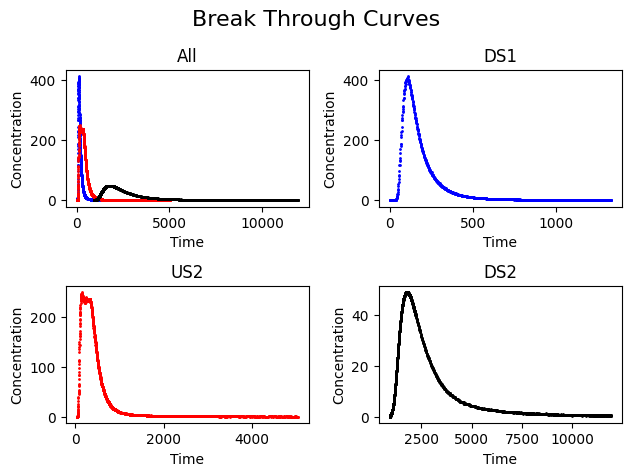

In [16]:
# Code Block 11

# Break Through Curves
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
fig.suptitle('Break Through Curves', fontsize=16)

ax[0,0].scatter(ds1_ts, ds1_sc, s=1, color='blue')
ax[0,0].scatter(us2_ts, us2_sc, s=1, color='red')
ax[0,0].scatter(ds2_ts, ds2_sc, s=1, color='black')
#ax[0,0].vlines(0.65,0,100, color='black',linestyles='dashed', label='User 1')
ax[0,0].set_title('All')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Concentration')


ax[0,1].scatter(ds1_ts, ds1_sc, s=1, color='blue')
#ax[0,0].vlines(0.65,0,100, color='black',linestyles='dashed', label='User 1')
ax[0,1].set_title('DS1')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Concentration')



#plt.subplot(1,3,2)

ax[1,0].scatter(us2_ts, us2_sc, s=1, color='red')
#ax[0,1].vlines(0.17,0,100, color='black',linestyles='dashed', label='User 1')
ax[1,0].set_title('US2')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Concentration')

#plt.subplot(1,3,3)

ax[1,1].scatter(ds2_ts, ds2_sc,s=1, color='black')
#ax[0,2].vlines(0.14,0,100, color='black',linestyles='dashed', label='User 1')
ax[1,1].set_title('DS2')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Concentration')

fig.tight_layout(pad=1)
#plt.tick_params(labelcolor="none", bottom=False, left=False)



# Fundamental Calculations
## Advective timescale and modal velocity
[Advective Timescale and Velocity](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/bff5183e57e94b439cb3154cd54a79a6/043c3e93461340ac9c542053dc94b6fc/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40043c3e93461340ac9c542053dc94b6fc)


In [17]:
# Code Block 12

# Advective Timescales and modal velocity

ds_tpeak = np.mean(ds2_ts[ds2_sc == max(ds2_sc)]);
us_tpeak = np.mean(us2_ts[us2_sc == max(us2_sc)]);

# Estimate velocity (m/s)
V = L / (ds_tpeak - us_tpeak);

# Estimating longitudinal dispersion coefficient
## Approach 1 
### Emperical Estimate
[Emperical Estimates](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/bff5183e57e94b439cb3154cd54a79a6/043c3e93461340ac9c542053dc94b6fc/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40043c3e93461340ac9c542053dc94b6fc)

In [18]:
# Code Block 13

U = V
B = 1
H = 1
S = 1 # slope needed from user
Us = np.sqrt(9.81 * H * S)
D = 0.0011 * ((U**2 * B**2)/ (H * Us))

## Approach 2
### Model Fitting

In [19]:
# Code Block 14

# Coming soon but flow will be to suck in conc v time then use the pulse advection dispersion equation to get 
# a hadful of points if not all and plot on top of the data. 

# Discharges
Check out these:

[Dilution Gauging](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/bff5183e57e94b439cb3154cd54a79a6/043c3e93461340ac9c542053dc94b6fc/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40043c3e93461340ac9c542053dc94b6fc)

In [20]:
# Code Block 15

# Discharge 

Q_ds = mass1/np.trapz(ds1_sc,ds1_ts) # integrating concentration by time (dt)

#Q at upstream site (m3/s)
Q_us = mass2/np.trapz(us2_sc,us2_ts)

#Change in Q over the study reach (m3/s)
#postive = net gaining
#negative = net losing

dQ = Q_ds - Q_us;

#print(Q_ds, Q_us, dQ) #checked out rounding in dQ

### Mass recovery
[mass recovery](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/85ac5df0eafd403d9c1ffc10a74c453a/4b5927e984d840bb9e0169ef3a7fa6da/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%404b5927e984d840bb9e0169ef3a7fa6da)

In [21]:
# Code Block 16

#mass recovered (g)

ds2_sc =ds2_sc.dropna()
ds2_ts = ds2_ts.dropna()

mrec = Q_ds * np.trapz(ds2_sc,ds2_ts)

#Cmass lost from u/s to d/s
mloss = mrec - mass2;
#Assume all gains occur before all losses
#(i.e., diution then mass loss)
#min gross loss (m3/s)

Qlossmin = mloss / np.trapz(us2_sc,us2_ts);
#print(Qlossmin)

#min gross gain (m3/s)
Qgainmin = dQ - Qlossmin;

#Assume all losses occur before all gains
#(i.e., mass loss then dilution)
#max gross loss (m3/s)
Qlossmax = mloss / np.trapz(ds2_sc,ds2_ts);

#max gross gain (m3/s)
Qgainmax = dQ - Qlossmax;


# Short-term storage calculations
Check these out: [Short term storage calculations](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/85ac5df0eafd403d9c1ffc10a74c453a/f65c4e6d525a46fea11d25750369d174/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40f65c4e6d525a46fea11d25750369d174)

In [22]:
# Code Block 17

# This bit just hacks the time up and creates a linear interpolation for t99.
# Reassign concentration and time to fit the rest of this flow

conc = ds2_sc
time = ds2_ts

# I cleaned all the temp vars names junk to temp cdt which describes the integration that is actually happening

temp_cdt1 = scipy.integrate.cumtrapz(conc,time, initial=0)
temp_cdt1=temp_cdt1/temp_cdt1[-1];
lim=0.99;
indexLOW=np.argwhere(temp_cdt1<lim);
indexHIGH=np.argwhere(temp_cdt1>lim);
        
#linear interpolation to calc t99
# This is clunky but my brain can only come up with this for now.

dummy_x1 = np.max(indexLOW)
dummy_x1 = temp_cdt1[dummy_x1]
dummy_x2 = np.min(indexHIGH)
dummy_x2 = temp_cdt1[dummy_x2]

dummy_y1 = np.max(indexLOW)
dummy_y1 = time[dummy_y1]
dummy_y2 = np.min(indexHIGH)
dummy_y2 = time[dummy_y2]

xx = [dummy_x1, dummy_x2]
yy = [dummy_y1, dummy_y2]

t99_function = interp1d(xx,yy,kind='linear') # equals matlab results
# These need to be. converted back to hours. 
t99 = t99_function(lim) # need to create the function then evaluate it, slightly different than matlab

#clip time and conc to values of t<=t99
cclip=conc[time<=t99];
tclip=time[time<=t99];
tclip_hr = tclip / 3600 # use this as a check 


print('t99 in hours is :',t99/3600, 'hrs \n', 't99 is seconds is: ', t99, 'seconds')

t99 in hours is : 2.7257136111108338 hrs 
 t99 is seconds is:  9812.568999999 seconds


### Temporal Moments
Here we compute the zeroth, first, second and third temporal moments.

[Temporal Moments](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/85ac5df0eafd403d9c1ffc10a74c453a/f65c4e6d525a46fea11d25750369d174/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40f65c4e6d525a46fea11d25750369d174)

In [23]:
# Code Block 18

###### MUST CONFIRM WITH AW ABOUT HOW WE WANT TIME HERE

#zeroth temporal moment
M0 = scipy.integrate.cumtrapz(cclip,tclip/3600,initial=0);
        
#do the normalization
cnorm=cclip/M0[-1];
              
#First Temporal Moment (M1)
M1 = scipy.integrate.cumtrapz((cclip * tclip**1), tclip, initial=0)
M1 = M1[-1] ;
M1norm = scipy.integrate.cumtrapz(cnorm * (tclip / 3600)**1,tclip/3600, initial=0);
M1norm = M1norm[-1] ;

#Second Central Moment (mu2)
mu2 = scipy.integrate.cumtrapz(cclip * ((tclip-M1)**2),tclip, initial=0);
mu2 = mu2[-1];       
mu2norm = scipy.integrate.cumtrapz(cnorm * (((tclip/3600)-M1norm)**2),tclip/3600, initial=0);
mu2norm = mu2norm[-1] ;

#Third Central Moment (mu3)
mu3=scipy.integrate.cumtrapz(cclip * ((tclip-M1)**3),tclip, initial=0);
mu3=mu3[-1]      
mu3norm=scipy.integrate.cumtrapz(cnorm * (((tclip/3600)-M1norm)**3),tclip/3600, initial=0);
mu3norm=mu3norm[-1];

### Coeffiecent of Variation

In [24]:
# Code Block 19

#Coeff. of Variation
CV = (mu2norm**(1/2)) / M1norm;
#print(CV)

### Skewness

In [25]:
# Code Block 20

#Skewness
skewness= mu3 / (mu2**(3/2));
skewnessnorm = mu3norm / (mu2norm**(3/2));

### Holdback Function
[Holdback Function](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/85ac5df0eafd403d9c1ffc10a74c453a/f65c4e6d525a46fea11d25750369d174/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40f65c4e6d525a46fea11d25750369d174)

In [26]:
# Code Block 21

#Holdback Function
dummy_arg1 = tclip / (M1norm*3600)
dummy_arg2 = scipy.integrate.cumtrapz(cnorm,tclip/3600,initial=0) #this is one element smaller
Holdback_lin=interp1d(dummy_arg1,dummy_arg2,kind='linear');
Holdback = Holdback_lin(1)
#print('Holdback',Holdback)

### Apparent Dispersivity and Dispersion
[Advection-Dispersion vs. Short-term Storage](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/85ac5df0eafd403d9c1ffc10a74c453a/f65c4e6d525a46fea11d25750369d174/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40f65c4e6d525a46fea11d25750369d174)

In [27]:
# Code Block 22

#Apparant Dispersivity
appdispersivity = (mu2norm*L) / 2;
        
#Apparant Dispersion
appdispersion=(mu2norm * L**2) / (2 * M1norm);

### Linear Interpolations for different time percentiles

In [28]:
# Code Block 23

#time for different percentiles
# Is there even a differene between normalized vs not? The output appears the same. 

temp_cdt = None       

#RAW

temp_cdt2=scipy.integrate.cumtrapz(cclip,tclip/3600, initial=0); # IS this the same temp_cdt? 
# We requested time to be in seconds so if we want these in hours we need this. 
temp_cdt2=temp_cdt2/temp_cdt2[-1];
        
#5
lim=0.05;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99

t05_fun=interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]]);
t05 = t05_fun(lim) 
#print('t05',t05)

#10

lim=0.10;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t10_fun = interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]]);                
t10 = t10_fun(lim)

#25
lim=0.25;

#pick the two points that bound the point of interest

indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t25_fun = interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t25 = t25_fun(lim)

#50
lim=0.50;

#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t50_fun = interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t50 = t50_fun(lim)
                
#75
lim=0.05;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t75_fun=interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t75 = t75_fun(lim)
                
#90
lim=0.90;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t90_fun = interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t90 = t90_fun(lim)
                
#95
lim=0.95;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdt2<lim);
indexHIGH=np.argwhere(temp_cdt2>lim);
        
#linear interpolation to calc t99
t95_fun = interp1d([temp_cdt2[np.max(indexLOW)],temp_cdt2[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t95 = t95_fun(lim)
                
#NORMALIZED
temp_cdtN=scipy.integrate.cumtrapz(cnorm,tclip/3600, initial=0); # get the time in hours here
# check this
        
#5
lim=0.05;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t05norm_fun = interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t05norm = t05norm_fun(lim) / 3600
        
#10
lim=0.10;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t10norm_fun = interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t10norm = t10norm_fun(lim)
                
#25
lim=0.25;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t25norm_fun =interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t25norm = t25norm_fun(lim)

#50
lim=0.50;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t50norm_fun=interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t50norm = t50norm_fun(lim)

#75
lim=0.05;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t75norm_fun=interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]]);                
t75norm = t75norm_fun(lim)

#90
lim=0.90;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t90norm_fun = interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])                
t90norm = t90norm_fun(lim)

#95
lim=0.95;
#pick the two points that bound the point of interest
indexLOW=np.argwhere(temp_cdtN<lim);
indexHIGH=np.argwhere(temp_cdtN>lim);
        
#linear interpolation to calc t99
t95norm_fun = interp1d([temp_cdtN[np.max(indexLOW)],temp_cdtN[np.min(indexHIGH)]],[tclip[np.max(indexLOW)],tclip[np.min(indexHIGH)]])
t95norm = t95norm_fun(lim)

#Peak time
temp=np.array([[tclip[cclip==max(cclip)]]]);
        
#if this peak value has more than one timestamp, use the np.mean
if np.size(temp)>1:
    temp=np.mean(temp)
        
#store it
tpeak = np.array(temp);
temp = None
            
#Peak conc
temp = [max(cclip)];
        
#if this peak value has more than one timestamp, use the np.mean
if np.size(temp)>1:
    temp=np.mean(temp)
        
#store it
cpeak=np.array(temp);
cpeak = cpeak[0]
temp = None

#Peak conc NORM
temp = [max(cnorm)];
        
#if this peak value has more than one timestamp, use the np.mean
if np.size(temp)>1:
    temp=np.mean(temp);
        
#store it
cpeakNORM=np.array(temp); 
cpeakNORM = cpeakNORM[0];
temp = None




# rSAS CALCULATIONS

Check these out: [Fundamental Calcs](https://edx.hydrolearn.org/courses/course-v1:IndianaUniversity+E710+2020_Fall/courseware/bff5183e57e94b439cb3154cd54a79a6/043c3e93461340ac9c542053dc94b6fc/?activate_block_id=block-v1%3AIndianaUniversity%2BE710%2B2020_Fall%2Btype%40sequential%2Bblock%40043c3e93461340ac9c542053dc94b6fc)

In [30]:
# Code Block 24

#*************************************************************************
# rSAS CALCULATIONS
#*************************************************************************

# Translate the inputs above into the variables Ciaran and I used to set
# up this code and analysis

#Geometry of the problem

# Injection time
tinj = ustime;

# Injection mass (g)
M_slug = mass2;

# Discharge (m3/s)
Q = Q_ds;

# Velocity (m/s)
V = V;

# Channel Area (m2)
A = Q/V;

# Channel depth (m)
D = A/W;

# Segment Length (m)
L = L;

# Valley Length (m)
Lval = L;

# Valley depth (m)
Dval = W / 2;

# Valley porosity
Porosity = 0.25;

# Channel Volume (m3)
Vch = A*L;

# Valley volume (m3)
Vval = Lval*Wval*Dval*Porosity;

# Total storage volume (m3)
Sref = Vch+Vval;

# Breakthrough Curve Info
# Time elapsed (s)

t_s = ds2_ts
        
# Downstream change in concentration (g/m3)
d_conc = ds2_sc;
        
        
    
# RUN THE rSAS  ANALYSIS AND THEN SAVE THE WORKSPACE

# Forward TTD
# Calculate the forward TTD from the breakthrough curve by normalizing by
# the input mass. Since we are assuming steady state, we can also assume
# that the forward and backward TTD are identical. It's the backward TTD
# that we need to calculate the rSAS function.
      
#pT = timeseries of mass normalized by total mass
pT = d_conc / (M_slug * Q);
      



# rSAS 

T = t_s;

# P_T(T) = cumulative form of backwards transit time distribution
PT = scipy.integrate.cumtrapz(pT,T,initial=0)

# S_T(T) = cumulative form of age-ranked storage
ST = (Q * T) - (Q * PT);

# Complements
#calculate from data

Qcomp = Q * (1 - PT);
Scomp = Sref - ST;
    
# Be sure there is a point at S = Sref and S = 0
Qcomp = [Qcomp[0], Qcomp, 0];
Scomp = [Sref, Scomp, 0];


# Want output here in file form and plots. TBB 10-18

In [31]:
# Code Block 25

import csv
import sys

headers = (['L (m)', 'Date and Time Slug 1', 'Date and Time Slug 2', 'mass of slug1 (g)', 'mass of slug 2 (g)', \
          'Q_us (m3/s)', 'Q_ds (m3/s)', 'dQ (m3/s)', 'Qlossmin (m3/s)', 'Qgainmin (m3/s)', 'Qlossmax (m3/s)', \
          'Qgainmax (m3/s)', 'mloss (g)', 'mrec (g)', 'V (m/s)'])

results1 = [L, convert_date(dstime), convert_date(ustime), mass1, mass2,Q_us, Q_ds, dQ, Qlossmin, Qgainmin, \
           Qlossmax, Qgainmax,  mloss, mrec, V]

# This handles the above output and write to a text file.
original_stdout = sys.stdout
#print(L, datetime1, datetime2, mass1, mass2, Q_us, Q_ds, dQ, Qlossmin, Qgainmin, Qlossmax, Qgainmax, mloss, mrec, V, M1, M1norm, mu2, mu2norm, mu3, mu3norm, skewness, skewnessnorm, CV, appdispersivity, appdispersion, holdback, t05, t10, t25, t50, t75, t90, t95, t99, t05norm, t10norm, t25norm, t50norm, t75norm, t90norm, t95norm, tpeak, cpeak, cpeaknorm)
with open('test.csv', 'w') as f:  
    sys.stdout = f
    c = convert_date(dstime)
    d = convert_date(ustime)
    print('The length L in meters is,',L)
    print('Start date and time,',c)
    print('End date and time,', d)
    print('mass1 in grams,',mass1)
    print('mass2 in grams,',mass2)
    print('Q_us (m3/s),', Q_us)
    print('Q_ds (m3/s),', Q_ds)
    print('dQ (m3/s),', dQ)
    print('Qlossmin (m3/s),', Qlossmin)
    print('Qgainmin (m3/s),', Qgainmin)
    print('Qlossmax (m3/s),', Qlossmax)
    print('Qgainmax (m3/s),', Qgainmax)
    print('mloss (g),', mloss)
    print('mrec (g),',mrec)
    print('V (m/s),', V)
    #print('M1 (complicated...)', M1)

    #f.write('The Length (L) in meters is: ',p);
    sys.stdout = original_stdout
    f.close()

In [32]:
# Code Block 26

# This handles the above output and write to a text file.
original_stdout = sys.stdout
#print(L, datetime1, datetime2, mass1, mass2, Q_us, Q_ds, dQ, Qlossmin, Qgainmin, Qlossmax, Qgainmax, mloss, mrec, V, M1, M1norm, mu2, mu2norm, mu3, mu3norm, skewness, skewnessnorm, CV, appdispersivity, appdispersion, holdback, t05, t10, t25, t50, t75, t90, t95, t99, t05norm, t10norm, t25norm, t50norm, t75norm, t90norm, t95norm, tpeak, cpeak, cpeaknorm)
with open('test_btc.csv', 'w') as f1:  
    sys.stdout = f1
    c = convert_date(dstime)
    d = convert_date(ustime)
    print('M1 (complicated),',M1)
    print('M1 Normalized (hr),',M1norm)
    print('mu2 (complicated),', mu2)
    print('mu2 norm (hr^2),',mu2norm)
    print('mu3,',mu3)
    print('mu3 norm (hr^3),', mu3norm)
    print('skewness (unitless),', skewness)
    print('skewness norm (unitless),', skewnessnorm)
    print('CV (m),', CV)
    print('appdispersivity (m2/hr),', appdispersivity)
    print('appdispersion (?),', appdispersion)
    print('Holdback (?),', Holdback)
    print('t05 (hr),', t05)
    print('t10 (hr),', t10)
    print('t25 (hr),', t25)
    print('t50 (hr),', t50)
    print('t75 (hr),', t75)
    print('t90 (hr),', t90)
    print('t95 (hr),', t95)
    print('t05 norm (hr),', t05norm)
    print('t10 norm (hr),', t10norm)
    print('t25 norm (hr),', t25norm)
    print('t50 norm (hr),', t50norm)
    print('t75 norm (hr),', t75norm)
    print('t90 norm (hr),', t90norm)
    print('t95 norm (hr),', t95norm)
    print('tpeak (hr),', tpeak)
    print('cpeak (g/m3),', cpeak)
    print('cpeak norm (complicated),', cpeakNORM)
    #print('M1 (complicated...)', M1)

    #f.write('The Length (L) in meters is: ',p);
    sys.stdout = original_stdout
    f1.close()

In [33]:
# Code Block 27

# We are going to store the results and the files in our own location for incorporation to the database

storeit_DB = 'ed180999593645e18e8a92cd1ea25cd7'
storeit_DBresource = hs.resource(storeit_DB)

# Upload one or more files to your resource 
storeit_DBresource.file_upload('test.csv', 'test_btc.csv', destination_path='testadd')

# Print the names of the files in the resource
print('Updated file list after adding a file: ')
for file in storeit_DBresource.files(search_aggregations=True): 
  print(file.path)

Updated file list after adding a file: 
test_btc.csv
testadd/test.csv
data/DS_INJ1-tbbtest.xlsx
data/DS_INJ2-tbbtest.xlsx
test.txt
test.csv
testadd/test_btc.csv
data/US_INJ2-tbbtest.xlsx


In [34]:
# Code Block 27

# We are going to store the results and the files in our own location for incorporation to the database

storeit_USER = resIdentifier
storeit_USERresource = hs.resource(storeit_USER)

# Upload one or more files to your resource 
storeit_USERresource.file_upload('test.csv', 'test_btc.csv')

# Print the names of the files in the resource
print('Updated file list after adding a file: ')
for file in storeit_USERresource.files(search_aggregations=True): 
  print(file.path)

Updated file list after adding a file: 
US_INJ2-tbbtest.xlsx
test_btc.csv
DS_INJ2-tbbtest.xlsx
DS_INJ1-tbbtest.xlsx
test.csv
